In [84]:
import pandas as pd
import matplotlib.pyplot as plt


In [85]:
df=pd.read_csv("time.csv")

In [86]:
df=pd.DataFrame(df)



In [87]:
import xgboost as xgb

In [88]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [89]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create additional features like year, month, day, and day of the week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek


In [90]:
# Define the features and target variable
X = df[['year', 'month', 'day', 'day_of_week']]
y = df['consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [91]:
# Create an XGBoost regressor
from xgboost import plot_importance
model = xgb.XGBRegressor(n_estimators=10000,learning_rate=0.001)

# Train the model
model.fit(X_train, y_train,eval_set=[(X_train,y_train),(X_test,y_test)],verbose=100)
# plot_importance(model)

[0]	validation_0-rmse:292012.43605	validation_1-rmse:305914.96574
[100]	validation_0-rmse:266555.41509	validation_1-rmse:279900.46286
[200]	validation_0-rmse:243683.76511	validation_1-rmse:256544.33059
[300]	validation_0-rmse:223160.93885	validation_1-rmse:235587.06053
[400]	validation_0-rmse:204772.98869	validation_1-rmse:216837.21268
[500]	validation_0-rmse:188323.06646	validation_1-rmse:200081.77758
[600]	validation_0-rmse:173627.28116	validation_1-rmse:185138.57828
[700]	validation_0-rmse:160529.10844	validation_1-rmse:171861.68241
[800]	validation_0-rmse:148882.77953	validation_1-rmse:160179.37668
[900]	validation_0-rmse:138559.09313	validation_1-rmse:149879.96240
[1000]	validation_0-rmse:129419.26235	validation_1-rmse:140840.06164
[1100]	validation_0-rmse:121350.07767	validation_1-rmse:132823.04873
[1200]	validation_0-rmse:114230.90387	validation_1-rmse:125777.02519
[1300]	validation_0-rmse:107975.29534	validation_1-rmse:119667.31035
[1400]	validation_0-rmse:102485.16357	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
features=pd.DataFrame(data=model.feature_importances_,index=model.feature_names_in_)

<Axes: title={'center': 'Features'}>

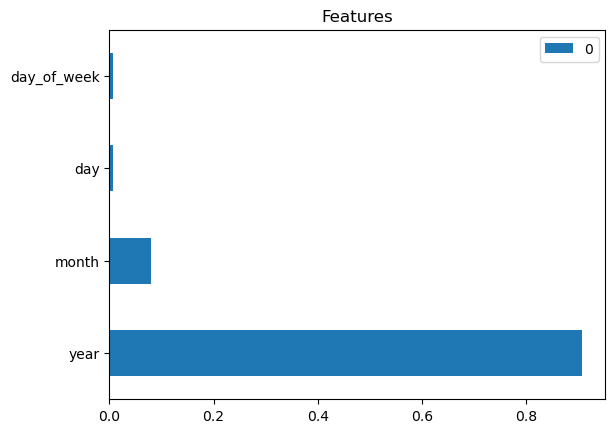

In [93]:
features.plot(kind='barh',title='Features')

In [94]:
# Define a date in the future for prediction
future_date = pd.to_datetime('2026-01-01')

# Create features for the future date
future_features = pd.DataFrame({
    'year': [future_date.year],
    'month': [future_date.month],
    'day': [future_date.day],
    'day_of_week': [future_date.dayofweek]
})

# Make predictions for the future date
future_prediction = model.predict(future_features)

print(f"Predicted consumption for {future_date}: {future_prediction[0]:.2f}")


Predicted consumption for 2026-01-01 00:00:00: 3724278.75


In [95]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the DataFrame index
df.set_index('date', inplace=True)

In [96]:
monthly_data = df.resample('M').sum() #M for month D for days Y for years


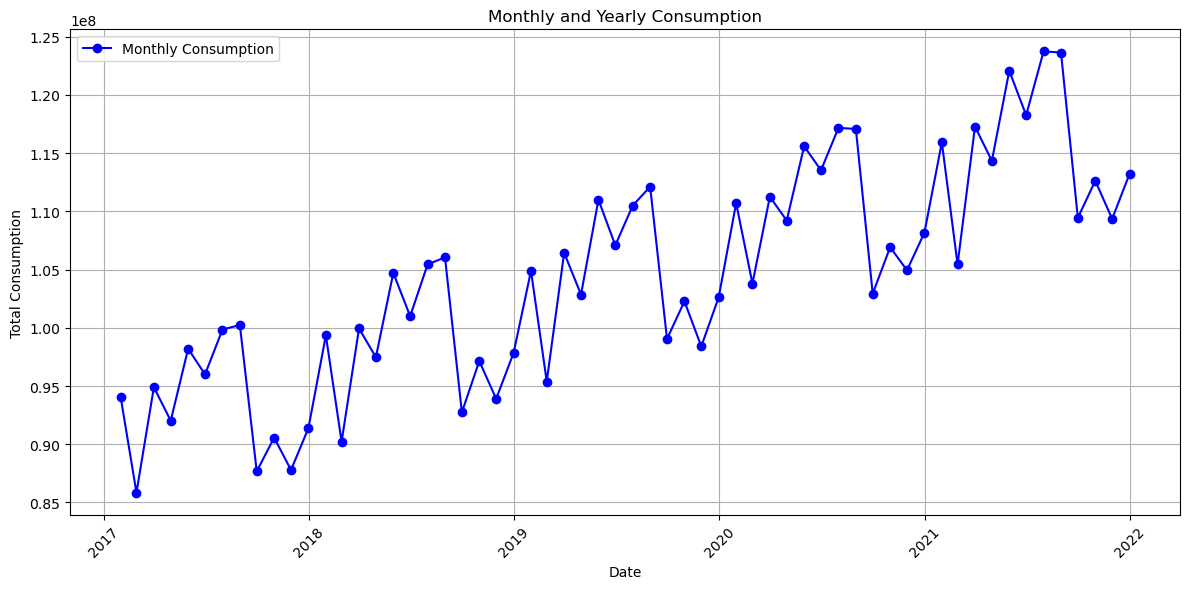

In [97]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the time series data
ax.plot(monthly_data.index, monthly_data['consumption'], marker='o', linestyle='-', color='b', label='Monthly Consumption')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Total Consumption')
ax.set_title('Monthly and Yearly Consumption')
ax.grid(True)
ax.legend()

# Show the plot

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [98]:
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2027-12-31')
date_range = pd.date_range(start_date, end_date)

predictions_df = pd.DataFrame({'date': date_range})

predictions_df['year'] = predictions_df['date'].dt.year
predictions_df['month'] = predictions_df['date'].dt.month
predictions_df['day'] = predictions_df['date'].dt.day
predictions_df['day_of_week'] = predictions_df['date'].dt.dayofweek


predictions = model.predict(predictions_df[['year', 'month', 'day', 'day_of_week']])


predictions_df['predicted_consumption'] = predictions


print(predictions_df)

           date  year  month  day  day_of_week  predicted_consumption
0    2021-01-01  2021      1    1            4             3722055.50
1    2021-01-02  2021      1    2            5             3627021.25
2    2021-01-03  2021      1    3            6             3726225.00
3    2021-01-04  2021      1    4            0             3748186.50
4    2021-01-05  2021      1    5            1             3749379.25
...         ...   ...    ...  ...          ...                    ...
2551 2027-12-27  2027     12   27            0             3641356.25
2552 2027-12-28  2027     12   28            1             3598539.75
2553 2027-12-29  2027     12   29            2             3578905.25
2554 2027-12-30  2027     12   30            3             3589537.25
2555 2027-12-31  2027     12   31            4             3598731.75

[2556 rows x 6 columns]


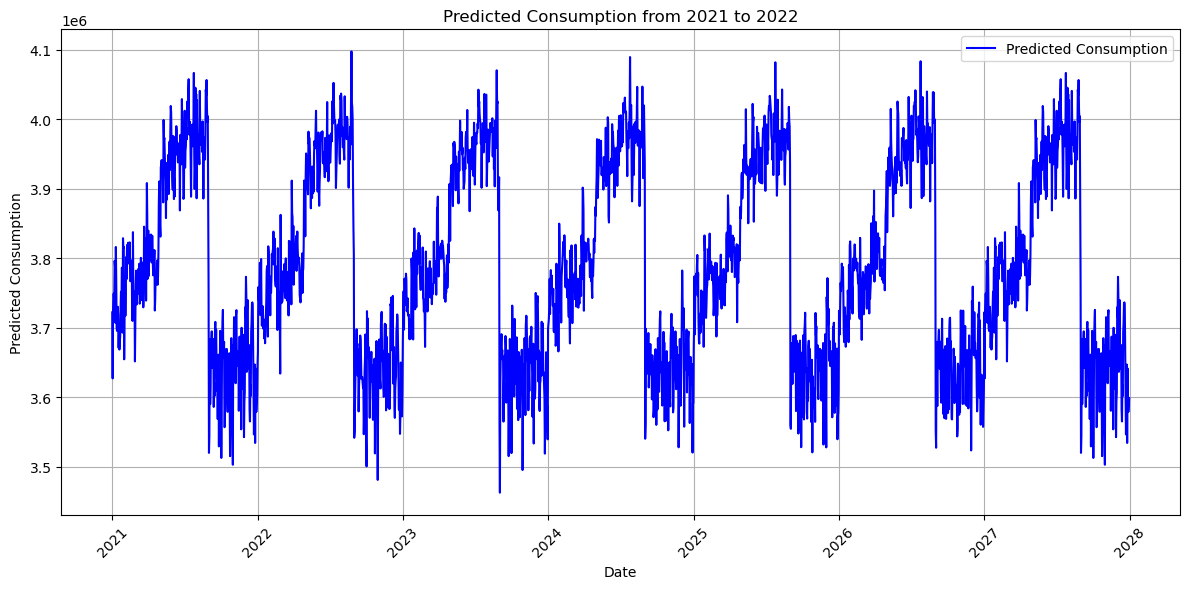

In [99]:

plt.figure(figsize=(12, 6))
plt.plot(predictions_df['date'], predictions_df['predicted_consumption'], color='b', label='Predicted Consumption')
plt.xlabel('Date')
plt.ylabel('Predicted Consumption')
plt.title('Predicted Consumption from 2021 to 2022')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
pred=model.predict(X_test)
pred

array([3398247.5, 3388266.2, 3064408.2, 2948343.5, 3565633.5, 3566900.5,
       2939640.2, 3623422. , 3257846. , 2988605. , 3353991. , 3967896.5,
       3769875.5, 3259594.8, 3569971.5, 3767344.8, 3242325.2, 3197265.8,
       3300683.5, 3784279. , 3432551.5, 2916369.8, 3041116.8, 3350420.8,
       2917448.5, 2994740. , 3126553.8, 3339540.8, 3269728. , 3496675. ,
       3646968. , 3645279.5, 3429438.8, 3722055.5, 3355429.2, 3283596.5,
       3780266.2, 3773445. , 3718306.2, 3611952.2, 3419792.8, 3595499. ,
       3224065.8, 3601819.8, 3582095.5, 3304973. , 3391238.2, 3889612.5,
       3566020.5, 2986257.5, 3532229.2, 3581502. , 3775439. , 3685710.5,
       3563019.8, 2871953.5, 3386275.2, 3380988.8, 3710791.5, 3069763. ,
       3215739.2, 3301693.5, 3528173.2, 2978279. , 3573525.2, 3663848.2,
       3740478.8, 3845893.5, 3810323.5, 3162140.8, 2948775. , 3316144.2,
       3773027.8, 3101120.5, 3669258.2, 3385945. , 3655996.5, 3236369.8,
       3983195. , 3299359.5, 3441907.8, 3833990.8, 

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error

In [102]:
# from sklearn.metrics import roc_curve, auc
# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, pred)

# # Calculate AUC
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

In [103]:
# Calculate various regression metrics
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
medae = median_absolute_error(y_test, pred)
evs = explained_variance_score(y_test, pred)
max_err = max_error(y_test, pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Median Absolute Error (MedAE): {medae}")
print(f"Explained Variance Score (EVS): {evs}")
print(f"Max Error: {max_err}")

Mean Squared Error (MSE): 7019657866.038089
Mean Absolute Error (MAE): 69670.70604176416
Median Absolute Error (MedAE): 62408.66598162148
Explained Variance Score (EVS): 0.9257196099165271
Max Error: 243113.36292152945


In [104]:
import numpy as np

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
def root_mean_squared_log_error(y_true, y_pred):
    y_true_log = np.log1p(y_true)
    y_pred_log = np.log1p(y_pred)
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))

mape = mean_absolute_percentage_error(y_test, pred)
rmsle = root_mean_squared_log_error(y_test, pred)

# Print the calculated metrics
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")


Mean Absolute Percentage Error (MAPE): 2.028767997514991%
Root Mean Squared Logarithmic Error (RMSLE): 0.02428558116548536


In [105]:
#for predicting past values
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2021-12-31')
date_range = pd.date_range(start_date, end_date)

predictions_df = pd.DataFrame({'date': date_range})

predictions_df['year'] = predictions_df['date'].dt.year
predictions_df['month'] = predictions_df['date'].dt.month
predictions_df['day'] = predictions_df['date'].dt.day
predictions_df['day_of_week'] = predictions_df['date'].dt.dayofweek


predictions = model.predict(predictions_df[['year', 'month', 'day', 'day_of_week']])


predictions_df['predicted_consumption'] = predictions


In [106]:
#for forcasting future values
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2024-12-31')
date_range = pd.date_range(start_date, end_date)

predictions_df2 = pd.DataFrame({'date': date_range})

predictions_df2['year'] = predictions_df['date'].dt.year
predictions_df2['month'] = predictions_df['date'].dt.month
predictions_df2['day'] = predictions_df['date'].dt.day
predictions_df2['day_of_week'] = predictions_df['date'].dt.dayofweek


predictions = model.predict(predictions_df2[['year', 'month', 'day', 'day_of_week']])


predictions_df2['future_consumption'] = predictions*1.3

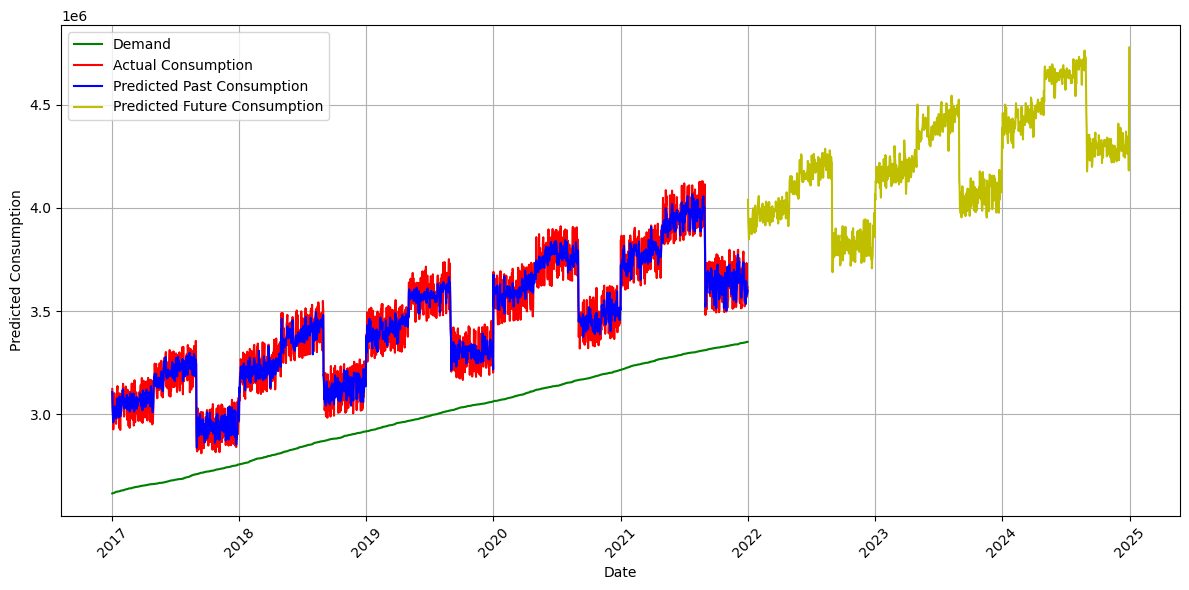

In [107]:

plt.figure(figsize=(12, 6))

plt.plot(predictions_df['date'], df['actual_limit'], color='g', label='Demand')
plt.plot(predictions_df['date'], df['consumption'], color='r', label='Actual Consumption')
plt.plot(predictions_df['date'], predictions_df['predicted_consumption'], color='b', label='Predicted Past Consumption')
plt.plot(predictions_df2['date'], predictions_df2['future_consumption'], color='y', label='Predicted Future Consumption')
plt.xlabel('Date')
plt.ylabel('Predicted Consumption')

plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
ploter = pd.DataFrame()
ploter['actual']=df['consumption'][-365:]
ploter['xgboost']=predictions_df['predicted_consumption'][-365:].values

ploter

,actual,xgboost
date,,
2021-01-01,3.845245e+06,3722055.50
2021-01-02,3.614011e+06,3627021.25
2021-01-03,3.865742e+06,3726225.00
2021-01-04,3.772579e+06,3748186.50
2021-01-05,3.759964e+06,3749379.25
...,...,...
2021-12-27,3.642164e+06,3641356.25
2021-12-28,3.732967e+06,3598539.75
2021-12-29,3.569011e+06,3578905.25


<Axes: xlabel='date'>

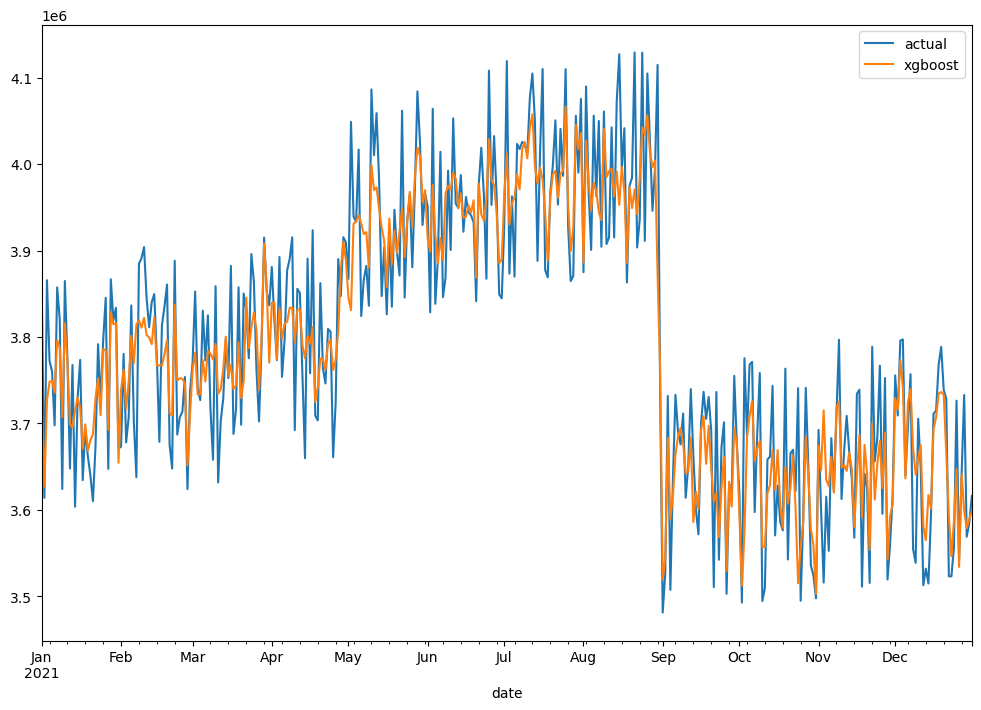

In [109]:
ploter[['actual','xgboost']].plot(figsize=(12,8))

In [110]:
# import pickle

# # Assuming 'model' is your trained XGBoost model
# with open('XGBoostRegressor.pkl', 'wb') as f:
#     pickle.dump(model, f)


In [111]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_true)
    num = np.sum(np.abs(y_true - y_pred))
    denom = np.sum(np.abs(y_train[1:] - y_train[:-1])) / (n - 1)
    return num / denom

def theil_u_static(y_true, y_pred):
    numerator = np.sqrt(np.mean((y_true - y_pred) ** 2))
    denominator = np.sqrt(np.mean(y_true ** 2)) + np.sqrt(np.mean(y_pred ** 2))
    return numerator / denominator

def forecast_bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mase = mean_absolute_scaled_error(y_test, pred, y_test)
theil_u = theil_u_static(y_test, pred)
bias = forecast_bias(y_test, pred)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MASE: {mase}")
print(f"Theil U Static: {theil_u}")
print(f"Forecast Bias: {bias}")


MAE: 69670.70604176416
MAPE: 2.028767997514991
MSE: 7019657866.038089
RMSE: 83783.39851091079
MASE: inf
Theil U Static: 0.012183047459953618
Forecast Bias: -7469.155427451755


C:\Users\asus\AppData\Local\Temp\ipykernel_24496\1481469027.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return num / denom


In [112]:
import numpy as np

def r_squared(y_true, y_pred):
    y_bar = np.mean(y_true)
    ss_tot = np.sum((y_true - y_bar) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

def mean_forecast_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

def tracking_signal(y_true, y_pred):
    mfe = mean_forecast_error(y_true, y_pred)
    mad = np.mean(np.abs(y_true - y_pred))
    return mfe / mad if mad != 0 else np.nan

def accuracy(y_true, y_pred):
    correct = np.sum(np.abs(y_true - y_pred))

    return 100-((correct / len(y_true))/np.mean(y_true))*100

def response_time(y_true, y_pred, threshold=0.1):
    errors = np.abs(y_true - y_pred)
    return np.sum(errors <= threshold) / len(y_true)



rsquared = r_squared(y_test, pred)
mfe = mean_forecast_error(y_test, pred)
tracking_sig = tracking_signal(y_test, pred)
acc = accuracy(y_test, pred)
resp_time = response_time(y_test, pred)

print(f"R-squared: {rsquared}")
print(f"Mean Forecast Error: {mfe}")
print(f"Tracking Signal: {tracking_sig}")
print(f"Accuracy: {acc}")
print(f"Response Time: {resp_time}")


R-squared: 0.9251245419936007
Mean Forecast Error: 7469.155427451755
Tracking Signal: 0.10720654133997672
Accuracy: 97.96845314594498
Response Time: 0.0


In [113]:
predictions_df['predicted_consumption']

0       3107430.25
1       3029603.00
2       2999093.25
3       2959689.75
4       2988117.25
           ...    
1821    3641356.25
1822    3598539.75
1823    3578905.25
1824    3589537.25
1825    3598731.75
Name: predicted_consumption, Length: 1826, dtype: float32

In [114]:
c = pd.DataFrame()

In [115]:
c['actual consumption']=df['consumption'].values.astype('int')
c['predicted_consumption']=predictions_df['predicted_consumption'].values
c['date']=df.index
c['population']=df['population']
c['demand']=df['actual_limit']
c=c.set_index('date')
print(c)
c.to_csv('final_output.csv')

            actual consumption  predicted_consumption  population  demand
date                                                                     
2017-01-01             3121791             3107430.25         NaN     NaN
2017-01-02             3054157             3029603.00         NaN     NaN
2017-01-03             2996857             2999093.25         NaN     NaN
2017-01-04             2925951             2959689.75         NaN     NaN
2017-01-05             2973448             2988117.25         NaN     NaN
...                        ...                    ...         ...     ...
2021-12-27             3642163             3641356.25         NaN     NaN
2021-12-28             3732966             3598539.75         NaN     NaN
2021-12-29             3569011             3578905.25         NaN     NaN
2021-12-30             3585164             3589537.25         NaN     NaN
2021-12-31             3616139             3598731.75         NaN     NaN

[1826 rows x 4 columns]
